#                 Taller de procesamiento de imágenes en Python. 


![](python.png)

### Autor: Cazajous Miguel A.


# Informe trabajo práctico Nº 2:

### Instalamos pip
python -m ensurepip --default-pip
### Utilizamos un archivo para instalar todos los módulos que se van a necesitar para el práctico
sudo pip install -r módulos

**Dentro del archivo se van agregando los módulos que se necesitan y se corre el comando anterior. Los módulos ya instalados no se reinstalan**

## Introducción

En el procesamiento de imaǵenes son importantes diferentes operaciones de mejoras en las mismas que permiten obtener más información de ciertos aspectos de interés, las cuales se agrupan dependiendo en el dominio donde se estudien: Dominio de frecuencia y dominio espacial. En el dominio de la frecuencia entran en consideración las transformadas de Fourier y en la espacial hace referencia a una directa modificación en los pixeles que componen la imagen. Esta última es la que vamos a utilizar.

Podemos representar una transformación espacial mediante $g(x,y)=T(f(x,y))$ donde $g(x,y)$ es la nueva imagen obtenida luego de aplicarle la transformación $T$ a la imagen $f(x,y)$.

Una forma de mejorar una imagen con el propósito de observar detalles no visibles antes de la mejora, es modificar los niveles de grises de la misma (Gray Level Transformations). 
Dentro de las GLT podemos diferencias 3 sub grupos: 

* Transformaciones lineales, dentro de las cuales esta la transformación negativa que se define como:

$$s = 255 - r$$

Con $s$ los pixeles luego de la transformación a los pixeles $r$.

* Transformaciones logarítimicas que se definen como:

$$s = c . log(r + 1)$$ 

Nuevamente $s$ y $r$ representan los nuevos y viejos pixeles de la imagen y $c$ es una constante que define el nivel de mejora que se desea.

* Transformaciones de potencia definidas como:

$$s=c . r^\gamma$$

Con $\gamma$ factor gamma, que determina el nivel de mejora.
Una transformación lineal del tipo T(r)=2*r puede producir desbordamiento y hace que un valor por encima de 255 sea interpretado de manera incorrecta.

### Histogramas

Un tipo de gráficos que utilizaremos son los histogramas. En los mismos se representa mediante barras la frecuencia de aparición de determinado valor.

En los casos en que se usen para graficar matrices que representen una imagen, muestran como se agrupan los diferentes valores, permitiendo obtener información extra de la imagen, como por ejemplo cuando apliquemos sobre la imagen diferentes transformaciones y querramos observar de otra manera los cambios que sufre la imagen.

En el histograma veremos que las barras representan la cantidad de pixeles que tienen el mismo valor indicado por el eje x.

### Imagenes binarias

Se refiere a imagenes que solo tienen dos valores diferentes entre los 256 valores totales. Por lo general se representan por los extremos, blanco y negro, es decir, 0 y 255.

### Filtros 

Además de los cambios en los niveles de contraste para la mejora de imágenes, se usarán también filtros. Los mismos hacen uso de máscaras de diferentes tamaños con las cuales realizan operaciones con las matrices que representan a las imágenes, resultando en una nueva matriz y por lo tanto en una nueva imagen. Las máscaras no son más que otras matrices de menor tamaño.

Por ejemplo tenemos una máscara de suavizado que saca un promedio del valor central y los vecinos:

$$M=\left[\begin{matrix} 1/9 & 1/9 & 1/9 \\ 1/9 & 1/9 & 1/9 \\ 1/9 & 1/9 & 1/9 \end{matrix}\right]=\frac{1}{9}\left[\begin{matrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{matrix}\right]$$

De tener una matriz mayor, como de 5x5, que es otro tamaño también usual, el valor de cada lugar de la matriz es $\frac{1}{25}$

El valor central de la matriz original que coincide con el centro de la máscara se reemplaza por una operación promedio entre el pixel y sus vecinos, determinados por el tamaño de la máscara.

<img src="https://pythoneyes.files.wordpress.com/2017/06/spatialfiltering.jpg" width="400">

De manera resumida lo que un filtro de suavizado hace es promediar los pixeles con sus vecinos de manera que la transición es más suave, este tipo de operaciones hace que los contornos sean menos notorios.

### Referencias:

- Guía propia del seminario
- [Gray Level Transformation](https://www.tutorialspoint.com/dip/gray_level_transformations.htm)
- [Image Enhancement](http://www.mv.helsinki.fi/home/khoramsh/4-Image%20Enhancement%20in%20Spatial%20Domain.pdf)
- [Image Threshold](https://docs.opencv.org/3.4.0/d7/d4d/tutorial_py_thresholding.html)
- [Filtros espaciales](https://pythoneyes.wordpress.com/2017/06/12/filtros-espaciales-lineales-en-python-3-ejemplificado-con-la-implementacion-de-filtro-de-suavizado-smooth-filter/)
- [Filtrado de imágenes](https://code.tutsplus.com/es/tutorials/image-filtering-in-python--cms-29202)

## Ejercicio 1:

### Cargar una imagen monocroma y realizar las siguientes modificaciones.

* **Aclararla**
* **Oscurecerla**
* **Obtener el negativo**

### Puede ser necesario correrlo dos veces

imagen.shape (348, 800)


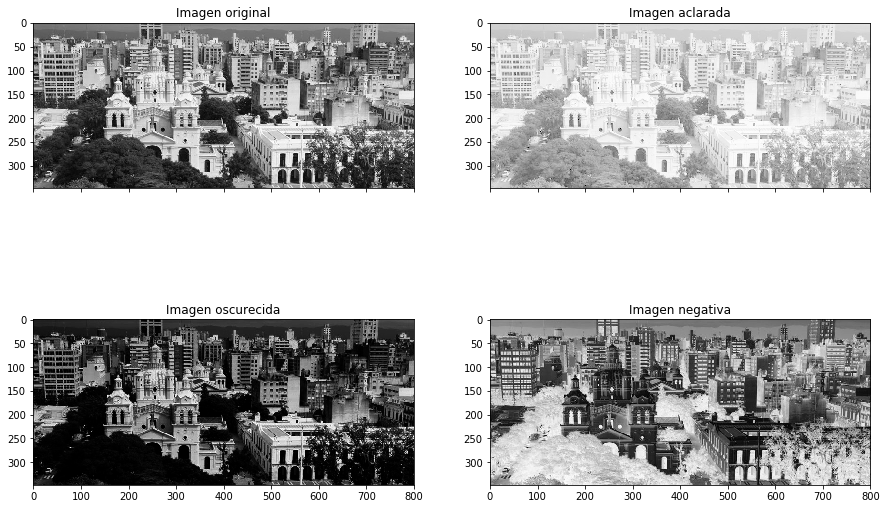

In [112]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

#Para aclarar la imagen puede existir desbordamiento y los valores que sobrepasan los 255 
#serán interpretados de manera no deseada. Definimos entonces una función gamma para un valor c=1.
def gamma(im, factor):
    imagen_modif = 255*(im/255)**factor
    return imagen_modif

def negativo(im):
    imagen_modif = 255 - im
    return imagen_modif

#Cargamos una imagen cualquiera en escala de grises y hacemos una conversión a entero.
imagen=cv.imread('Córdoba.jpg', cv.IMREAD_GRAYSCALE)
imagen = imagen.astype('uint8')

#Vemos que solo posee dos dimensiones, es decir es monocromática.
print("imagen.shape", imagen.shape)

#Obtenemos una versión aclarada con un factor < 1, una oscurecida con un factor > 1
#y negativa de la imagen original.
imagen_a = gamma(imagen, 0.25)
imagen_a = imagen_a.astype('uint8')

imagen_o = gamma(imagen,2.5)
imagen_o = imagen_o.astype('uint8')

imagen_n = negativo(imagen)
imagen_n = imagen_n.astype('uint8')

#Graficamos
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True)
fig.set_figheight(10)
fig.set_figwidth(15)
axs[0,0].set_title("Imagen original")
axs[0,0].imshow(imagen, cmap='gray', vmin=0, vmax=255)
axs[0,1].set_title("Imagen aclarada")
axs[0,1].imshow(imagen_a, cmap='gray', vmin=0, vmax=255)
axs[1,0].set_title("Imagen oscurecida")
axs[1,0].imshow(imagen_o, cmap='gray', vmin=0, vmax=255)
axs[1,1].set_title("Imagen negativa")
axs[1,1].imshow(imagen_n, cmap='gray', vmin=0, vmax=255)
plt.show()

## Ejercicio 2:

### Mejorar el contraste de los niveles de gris intermedios de la imagen oscurecida en el ejercicio 1.


Una imagen con poco contraste nos muestra un histograma muy angosto, es decir que el rango de valores es muy pequeño. Para mejorar la imagen utilizamos el equalizador que trae la librería openCV. Esto hace que el rango de valores se distribuya en todos los valores de 0 a 255 logrando una mejora en la imagen.

Lo comentado anteriormente puede entenderse mejor del siguiente link.

[Equalización de histograma](https://docs.opencv.org/2.4/doc/tutorials/imgproc/histograms/histogram_equalization/histogram_equalization.html)

Para realizar los gráficos siguientes se hizo uso de gridspec, que permite que se puedan graficar figuras de diferente tamaño, ajustando convenientemente los ejes.

[Customize figure layouts](https://matplotlib.org/tutorials/intermediate/gridspec.html)

### Puede ser necesario correrlo dos veces 

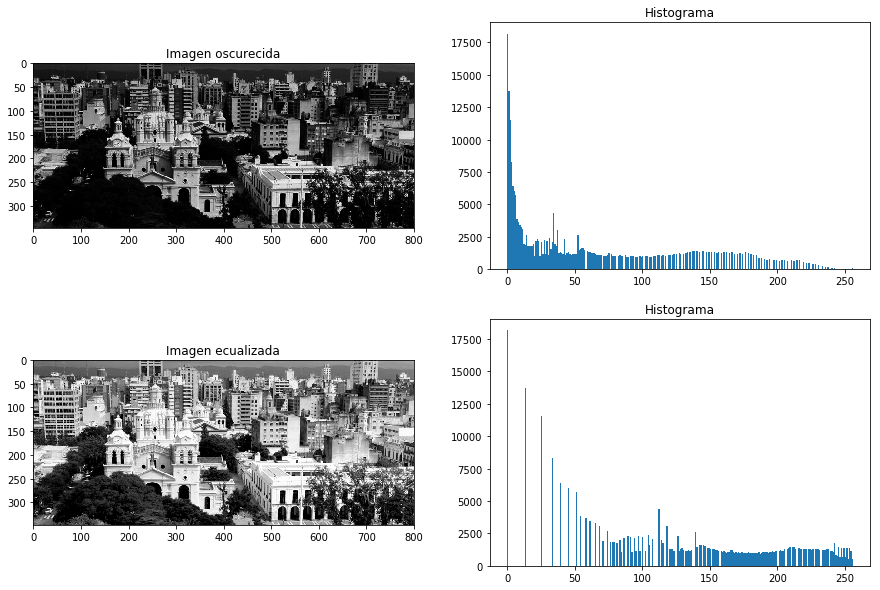

In [113]:
import matplotlib.gridspec as gridspec

#Hacemos uso de la función de equalización, haciendo antes una conversión de tipo a valores enteros.
imagen_o=imagen_o.astype('uint8')
imagen_eq = cv.equalizeHist(imagen_o)

#Crea una grilla de 2 filas y 2 columnas.
gs = gridspec.GridSpec(2, 2)

#Define los tamaños de las imágenes
figs = plt.figure(constrained_layout=True)
figs.set_figheight(10)
figs.set_figwidth(15)

#Aquí se pueden definir los tamaños de las celdas.
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

#Se grafican las imágenes y se colocan los títulos
ax1.set_title('Imagen oscurecida')
ax1.imshow(imagen_o, cmap = 'gray', vmin =0 ,vmax=255)

ax2.set_title('Histograma')
ax2.hist(imagen_o[:,:].ravel(),256,[0,256])

ax3.set_title('Imagen ecualizada')
ax3.imshow(imagen_eq, cmap = 'gray', vmin =0 ,vmax=255)

ax4.set_title('Histograma')
ax4.hist(imagen_eq[:,:].ravel(),256,[0,256])

plt.show()

## Ejercicio 3:

### Mostrar en una misma ventana, la imagen original, y las obtenidas en el ejercicio 1 y 2, y en otra sus respectivos histogramas. Realice comentarios que expliquen los cambios en el histograma.


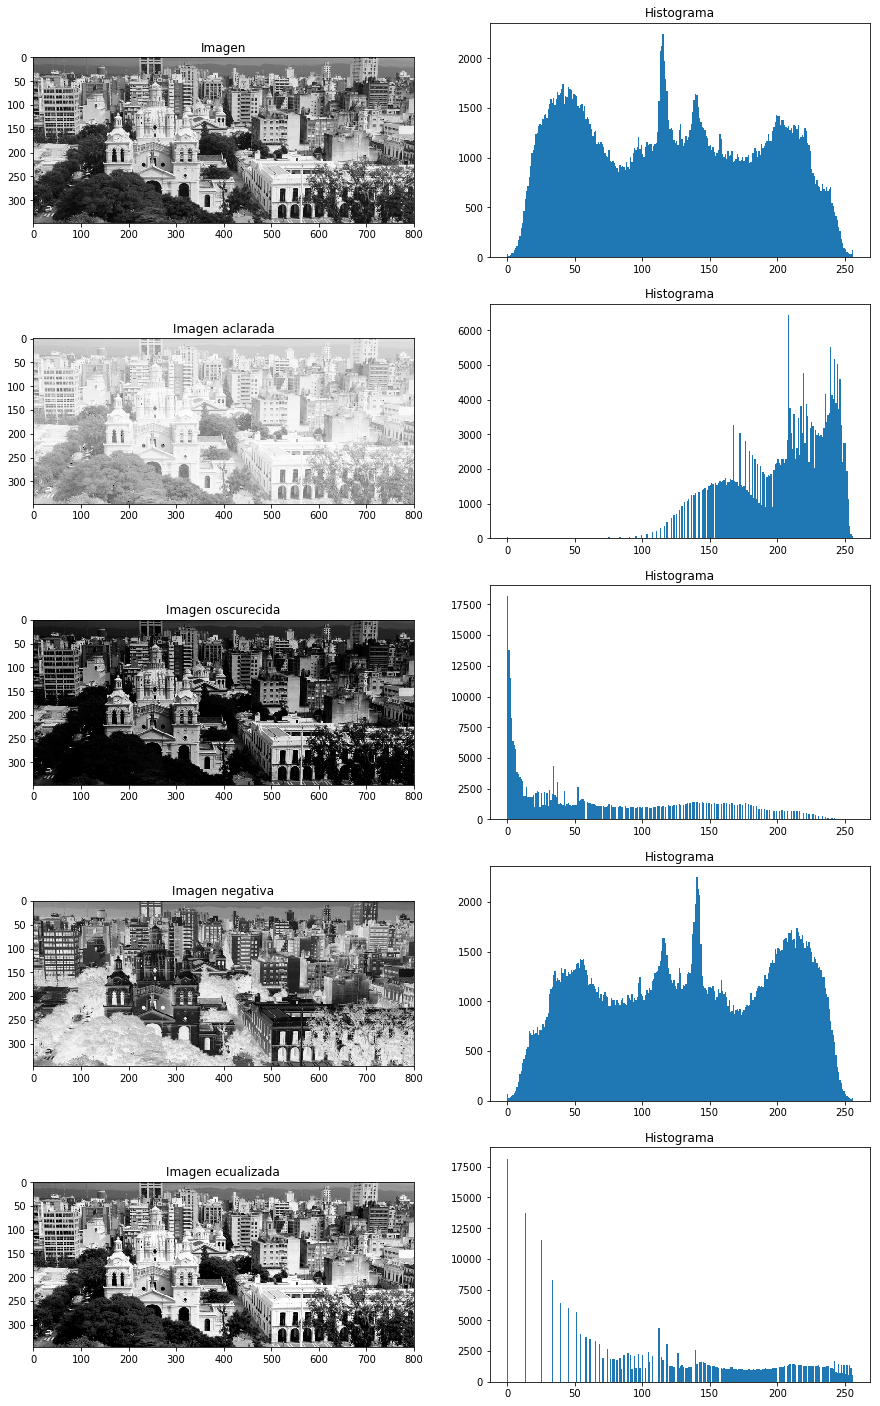

In [114]:
#Crea una grilla de 5 filas y 2 columnas.
gs = gridspec.GridSpec(5, 2)

#Define los tamaños de las imágenes
figs = plt.figure(constrained_layout=True)
figs.set_figheight(25)
figs.set_figwidth(15)

#Aquí se pueden definir los tamaños de las celdas.
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])
ax5 = plt.subplot(gs[4])
ax6 = plt.subplot(gs[5])
ax7 = plt.subplot(gs[6])
ax8 = plt.subplot(gs[7])
ax9 = plt.subplot(gs[8])
ax10 = plt.subplot(gs[9])

#Se grafican las imágenes y se colocan los títulos
ax1.set_title('Imagen')
ax1.imshow(imagen, cmap = 'gray', vmin =0 ,vmax=255)

ax2.set_title('Histograma')
ax2.hist(imagen[:,:].ravel(),256,[0,256])

ax3.set_title('Imagen aclarada')
ax3.imshow(imagen_a, cmap = 'gray', vmin =0 ,vmax=255)

ax4.set_title('Histograma')
ax4.hist(imagen_a[:,:].ravel(),256,[0,256])

ax5.set_title('Imagen oscurecida')
ax5.imshow(imagen_o, cmap = 'gray', vmin =0 ,vmax=255)

ax6.set_title('Histograma')
ax6.hist(imagen_o[:,:].ravel(),256,[0,256])

ax7.set_title('Imagen negativa')
ax7.imshow(imagen_n, cmap = 'gray', vmin =0 ,vmax=255)

ax8.set_title('Histograma')
ax8.hist(imagen_n[:,:].ravel(),256,[0,256])

ax9.set_title('Imagen ecualizada')
ax9.imshow(imagen_eq, cmap = 'gray', vmin =0 ,vmax=255)

ax10.set_title('Histograma')
ax10.hist(imagen_eq[:,:].ravel(),256,[0,256])

plt.show()

### Comentarios:

* En la primer gráfica vemos la imagen original y su histograma. Simplemente podemos decir que se ve que la imagen tiene mucho contraste, pues abarca todos los valores desde 0 a 255 y existe un balance entre ellos.
* En la imagen aclarada vemos que el histograma tiene una tendencia a los valores más altos, es decir a aquellos que se van a proximando al blanco.  
* En la imagen oscurecida lo que ocurre es lo opuesto a lo anterior. Aquí el histograma muestra que los valores más bajos (cerca del negro) son los más frecuentes, siendo el valor 0 el más encontrado.
* En la imagen negativa puede verse claramente una representación espejada de la imagen original, lo que concuerda si se comparan ambas imágenes a simple vista. Son opuestas.
* En la imagen ecualizada vemos que los valores de la imagen oscurecida ahora están distribuidos a lo largo de todos los valores posibles.

## Ejercicio 4:

### Obtener el valor de gris más repetido en cada imagen.

In [115]:
#Definimos una función que cuenta la cantidad de ocurrencias de un determinado valor. 
#Recorre el array y cada valor del pixel lo toma como llave. Si no existe le asigna el valor 1 (una ocurrencia)
#Y si ya existe va incrementando el valor de esa llave. Al final de recorrer el array tenemos un diccionario
#que tiene tantas llaves como diferentes valores haya en el array y como valor su cantidad de ocurrencias.
def valor_mas_frec(array):
    dicc = {}
    for i in range(0,len(array[:,0])):
        for j in range(0, len(array[0,:])):
            if array[i][j] in dicc:
                dicc[array[i][j]] += 1
            else:
                dicc[array[i][j]] = 1
    #Buscamos el máximo valor y devolvemos la llave correspondiente
    max = array[0][0]
    for key,val in dicc.items():
        if dicc[key] > dicc[max]:
            max = key
    return max

#Definimos un simple arreglo de prueba
prueba = np.array([[1, 2, 4], [7, 5, 3], [4, 1, 2]])

#Probamos nuestra función
dictionary = valor_mas_frec(prueba)
print("Prueba de función: \n",dictionary)

#Ejecutamos la función con cada una de las matrices que representan las imágenes anteriores.
im = valor_mas_frec(imagen)
im_o = valor_mas_frec(imagen_o)
im_a = valor_mas_frec(imagen_a)
im_n = valor_mas_frec(imagen_n)
im_eq = valor_mas_frec(imagen_eq)

print("Valor más frecuente en la imagen original:", im)
print("Valor más frecuente en la imagen oscurecida:", im_o)
print("Valor más frecuente en la imagen aclarada:", im_a)
print("Valor más frecuente en la imagen negativa:", im_n)
print("Valor más frecuente en la imagen oscurecida equalizada:", im_eq)

Prueba de función: 
 1
Valor más frecuente en la imagen original: 115
Valor más frecuente en la imagen oscurecida: 0
Valor más frecuente en la imagen aclarada: 208
Valor más frecuente en la imagen negativa: 140
Valor más frecuente en la imagen oscurecida equalizada: 0


## Ejercicio 5:

### Elija una imagen monocroma y luego binarizarla con dos métodos, uno automático y otro subjetivo utilizando el histograma.


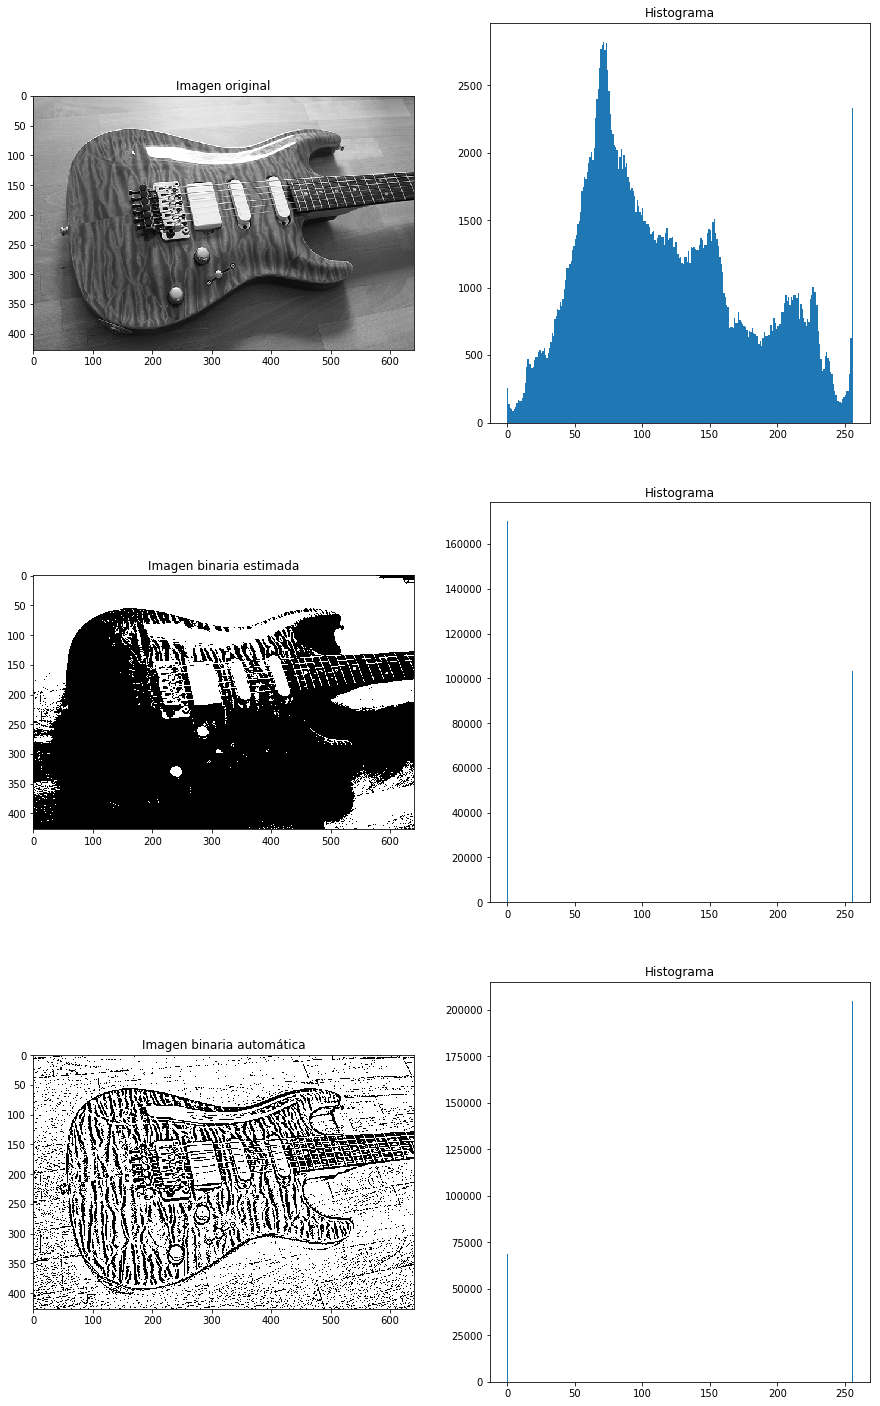

In [117]:
#Elegimos una nueva imagen y la cargamos con escala de grises como hicimos anteriormente.
imagen=cv.imread('pensa-suhr.jpg', cv.IMREAD_GRAYSCALE)

#Definimos una función que devuelve la matriz binaria correspondiente de la imagen original.
#En x e y guardamos las dimensiones de la matriz. En la variable t especificamos con 1 si queremos que 
#cuando se sobrepase el valor umbral se considere blanco (255), de lo contrario si pasa el valor umbral
#será negro (0).
def binaria(x,y,umbral,imagen,t):
    imagen_bin_est=np.empty([x,y])
    if (t == 1):
        a = 255
        b = 0
    else:
        a = 0
        b = 255
    for i in range(0,len(imagen[:,0])):
        for j in range(0, len(imagen[0,:])):
            if imagen[i][j] > umbral:
                imagen_bin_est[i][j] = a
            else:
                imagen_bin_est[i][j] = b
    return imagen_bin_est

#Usamos la función.
imagen_bin_est = binaria(len(imagen[:,0]),len(imagen[0,:]),130,imagen, 1)

#Transformamos la imagen usando una función de opencv.
#Los últimos dos valores representan el tamaño de la vecindad de pixeles, que se usa para calcular el valor 
#umbral y un valor de media.
imagen_bin_auto = cv.adaptiveThreshold(imagen,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,15,5)

#Armamos la grilla.
gs = gridspec.GridSpec(3, 2)

#Define los tamaños de las imágenes
figs = plt.figure(constrained_layout=True)
figs.set_figheight(25)
figs.set_figwidth(15)

#Aquí se pueden definir los tamaños de las celdas.
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])
ax5 = plt.subplot(gs[4])
ax6 = plt.subplot(gs[5])

ax1.set_title("Imagen original")
ax1.imshow(imagen, cmap='gray', vmin=0, vmax=255)
ax2.set_title("Histograma")
ax2.hist(imagen[:].ravel(), 256, [0,256])

ax3.set_title("Imagen binaria estimada")
ax3.imshow(imagen_bin_est, cmap='gray', vmin=0, vmax=255)
ax4.set_title("Histograma")
ax4.hist(imagen_bin_est[:].ravel(), 256, [0,256])

ax5.set_title("Imagen binaria automática")
ax5.imshow(imagen_bin_auto, cmap='gray', vmin=0, vmax=255)
ax6.set_title("Histograma")
ax6.hist(imagen_bin_auto[:].ravel(), 256, [0,256])

plt.show()

## Ejercicio 6:

### Construya un tablero de ajedrez de 512x512. Aplicarle una máscara de suavizado de 3x3 y de 5x5. Mostrar el tablero original y los filtrados. 

### Repetir para una imagen monocroma.


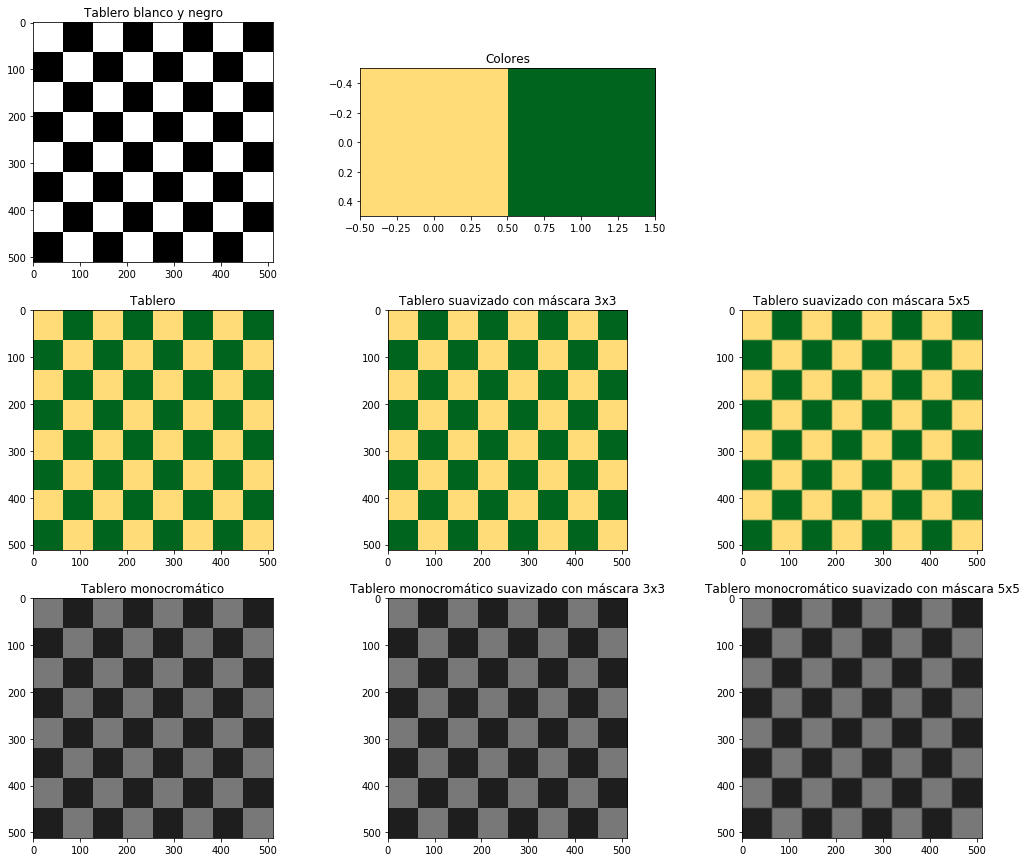

In [118]:
#Armamos una matriz de 512 x 512 x 3 con unos.
tablero = np.ones([512, 512, 3])

#Convertimos a entero
tablero = tablero.astype('uint8')

#Calculamos el tamaño de cada celda.
celda = 512//8

#Nos movemos por celda, no por pixel.
#Usando la función módulo nos movemos convenientemente por el tablero, primero pintando los valores impares, luego
#los pares y así sucesivamente hasta cubrir todas las filas.
for i in range(0,8):
    for j in range(0,8):
        if j % 2 != 0 and i % 2 == 0:
            tablero[i*celda:(i+1)*celda, j*celda:celda*(j+1)] = 0*tablero[i*celda:(i+1)*celda, j*celda:celda*(j+1)]
        if j % 2 == 0 and i % 2 != 0:
            tablero[i*celda:(i+1)*celda, j*celda:celda*(j+1)] = 0*tablero[i*celda:(i+1)*celda, j*celda:celda*(j+1)]

            
#Armamos una pequeña matriz de 1x2x3 para mostrar los colores que deseamos poner en nuestro tablero.
colores=np.ones([1,2,3])
colores = colores.astype('uint8')

#Seleccionamos un color con alguna aplicación online que nos devuelva sus valores RGB.
#Elegimos para el color oscuro: 0,100,30.
#Para el color claro: 255, 220, 120.

#Definimos el color claro.
colores[0,0,0]=255*colores[0,0,0]
colores[0,0,1]=220*colores[0,0,1]
colores[0,0,2]=120*colores[0,0,2]

#Definimos el color oscuro.
colores[0,1,0]=0*colores[0,1,0]
colores[0,1,1]=100*colores[0,1,1]
colores[0,1,2]=30*colores[0,1,2]

#Guardamos el tablero sin pintar.
aux=tablero[:,:]*255

#Pintamos nuestro tablero
for i in range(0,len(tablero[:,0])):
    for j in range(0,len(tablero[0,:])):
        for k in range(0,3):
            if k == 0:
                if tablero[i,j,k] == 0:
                    tablero[i,j,k] = 0
                else:
                    tablero[i,j,k] = 255
            if k == 1:
                if tablero[i,j,k] == 0:
                    tablero[i,j,k] = 100
                else:
                    tablero[i,j,k] = 220
            if k == 2:
                if tablero[i,j,k] == 0:
                    tablero[i,j,k] = 30
                else:
                    tablero[i,j,k] = 120

#Versión monocromática del tablero, tomando la componente azul.
tablero_mono = tablero[:,:,2]

#Definimos las dos máscaras
mask1 = np.ones([3,3])
mask1 = mask1 * 1/9

mask2 = np.ones([5,5])
mask2 = mask2 * 1/25

#Realizamos el suavizado del tablero a color
filtrado1 = cv.filter2D(tablero, -1, mask1)
filtrado2 = cv.filter2D(tablero, -1, mask2)

#Realizamos el suavizado del tablero monocromático
tablero_mono_filt1 = cv.filter2D(tablero_mono, -1, mask1)
tablero_mono_filt2 = cv.filter2D(tablero_mono, -1, mask2)

#Creamos la grilla
gs = gridspec.GridSpec(3, 3)

#Define los tamaños de las imágenes
figs = plt.figure(constrained_layout=True)
figs.set_figheight(15)
figs.set_figwidth(18)

#Aquí se pueden definir los tamaños de las celdas.
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1:2])
ax3 = plt.subplot(gs[1,0])
ax4 = plt.subplot(gs[1,1])
ax5 = plt.subplot(gs[1,2])
ax6 = plt.subplot(gs[2,0])
ax7 = plt.subplot(gs[2,1])
ax8 = plt.subplot(gs[2,2])

ax1.set_title("Tablero blanco y negro")
ax1.imshow(aux, cmap='gray', vmin=0, vmax=255)

ax2.set_title("Colores")
ax2.imshow(colores, cmap='gray', vmin=0, vmax=255)

ax3.set_title("Tablero")
ax3.imshow(tablero, cmap='gray', vmin=0, vmax=255)

ax4.set_title("Tablero suavizado con máscara 3x3")
ax4.imshow(filtrado1, cmap='gray', vmin=0, vmax=255)

ax5.set_title("Tablero suavizado con máscara 5x5")
ax5.imshow(filtrado2, cmap='gray', vmin=0, vmax=255)

ax6.set_title("Tablero monocromático")
ax6.imshow(tablero_mono, cmap='gray', vmin=0, vmax=255)

ax7.set_title("Tablero monocromático suavizado con máscara 3x3")
ax7.imshow(tablero_mono_filt1, cmap='gray', vmin=0, vmax=255)

ax8.set_title("Tablero monocromático suavizado con máscara 5x5")
ax8.imshow(tablero_mono_filt2, cmap='gray', vmin=0, vmax=255)

plt.show()

## Ejercicio 7:

### Aplicar la máscara

$$M=\left[\begin{matrix} 1 & 1 & 1 \\ 0 & 0 & 0 \\ -1 & -1 & -1 \end{matrix}\right]$$

### al tablero del ejercicio anterior. Que se observa y por qué? Idem con la máscara traspuesta. Sume ambas imágenes filtradas y presente el resultado.

### Repetir para una imagen monocroma.


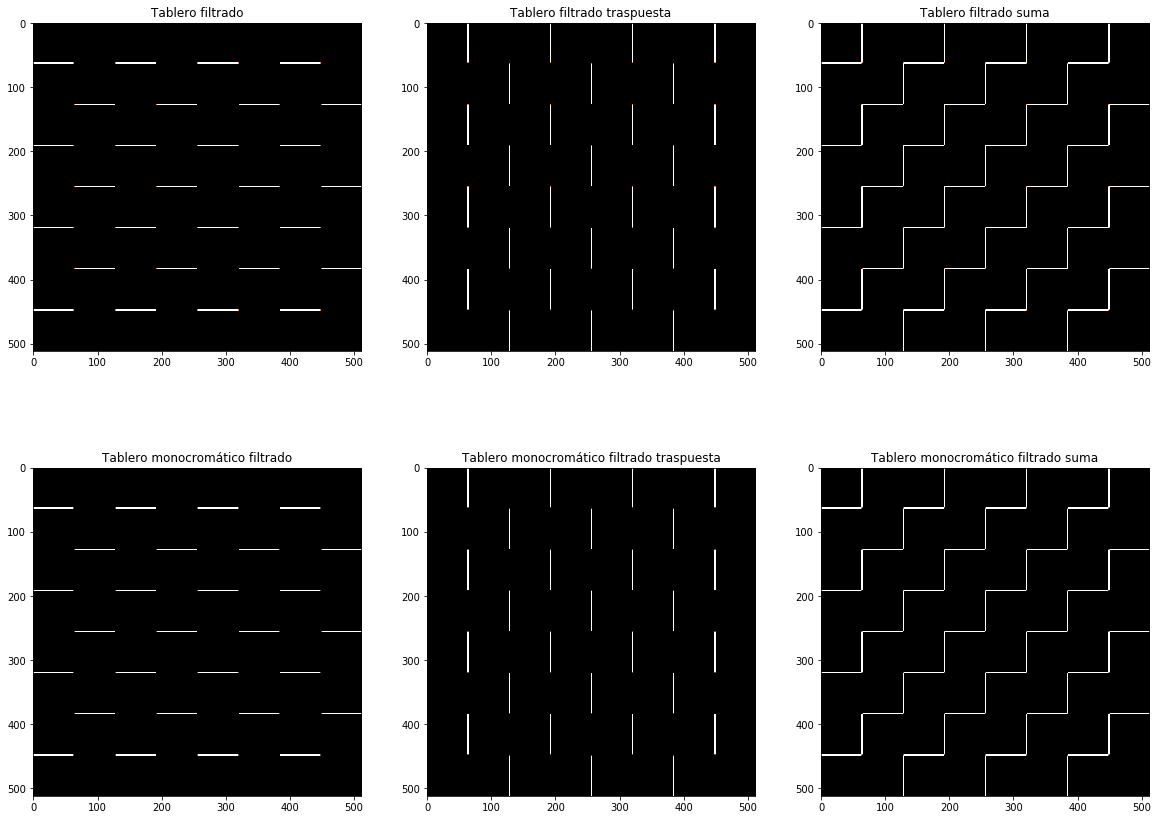

In [44]:
#Definimos la máscara propuesta
mask = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])

#Máscara traspuesta
mask_t = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])

#Realizamos el filtrado con ambas máscaras a la imagen original y a la monocromática.
filtrado = cv.filter2D(tablero, -1, mask)
filtrado_t = cv.filter2D(tablero, -1, mask_t)
filtrado_suma = filtrado + filtrado_t
filtrado_mono = cv.filter2D(tablero_mono, -1, mask)
filtrado_mono_t = cv.filter2D(tablero_mono, -1, mask_t)
filtrado_mono_suma = filtrado_mono + filtrado_mono_t

#Creamos la grilla
gs = gridspec.GridSpec(2, 3)

#Define los tamaños de las imágenes
figs = plt.figure(constrained_layout=True)
figs.set_figheight(15)
figs.set_figwidth(20)

#Aquí se pueden definir los tamaños de las celdas.
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])
ax3 = plt.subplot(gs[0,2])
ax4 = plt.subplot(gs[1,0])
ax5 = plt.subplot(gs[1,1])
ax6 = plt.subplot(gs[1,2])

#Graficamos
ax1.set_title("Tablero filtrado")
ax1.imshow(filtrado, cmap='gray', vmin=0, vmax=255)

ax2.set_title("Tablero filtrado traspuesta")
ax2.imshow(filtrado_t, cmap='gray', vmin=0, vmax=255)

ax3.set_title("Tablero filtrado suma")
ax3.imshow(filtrado_suma, cmap='gray', vmin=0, vmax=255)

ax4.set_title("Tablero monocromático filtrado")
ax4.imshow(filtrado_mono, cmap='gray', vmin=0, vmax=255)

ax5.set_title("Tablero monocromático filtrado traspuesta")
ax5.imshow(filtrado_mono_t, cmap='gray', vmin=0, vmax=255)

ax6.set_title("Tablero monocromático filtrado suma")
ax6.imshow(filtrado_mono_suma, cmap='gray', vmin=0, vmax=255)

plt.show()

### Comentario:

El filtrado es una especie de detección de bordes, decimos una especie, por que no lo hace con cada borde, solo lo hace si el cuadrado blanco está arriba (primer caso) o a la izquierda (con la máscara traspuesta).
Si definimos dos mátrices más se puede completar la imagen con todos los bordes.

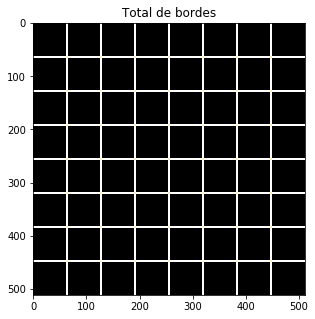

In [45]:
#Definimos dos máscaras más.
mask_2 = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
mask_t_2 = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

#Obtenemos el resultado luego de aplicado el filtrado
filtrado_2 = cv.filter2D(tablero, -1, mask_2)
filtrado_t_2 = cv.filter2D(tablero, -1, mask_t_2)

#Obtenemos la suma total
total = filtrado_2 + filtrado_t_2 + filtrado_suma

#Graficamos
gs = gridspec.GridSpec(1, 1)

#Define los tamaños de las imágenes
figs = plt.figure(constrained_layout=True)
figs.set_figheight(5)
figs.set_figwidth(5)

#Aquí se pueden definir los tamaños de las celdas.
ax1 = plt.subplot(gs[0,0])

ax1.set_title("Total de bordes")
ax1.imshow(total)
plt.show()

Las máscaras que propone el ejercicio se conocen como operadores de Prewitt para el eje $\textbf{y}$ y $\textbf{x}$ (traspuesta) respectivamente.

[Prewitt Operator](https://en.wikipedia.org/wiki/Prewitt_operator)

Con las dos primeras máscaras que propone el ejercicio debería ser suficiente para representar la totalidad de los bordes. La operación de detección de bordes no es la misma que para un filtrado de suavizado y la función usada no es la correcta, ya que una operación de detección de bordes utiliza la convolución y no es una función lineal la que utiliza **filter2D**.

## Ejercicio 8:

### Generar dos máscaras (o elementos estructurantes), uno circular y otro cuadrado, uno de ellos de suavizado y el otro detección de bordes. Ambos los suficientemente amplios que abarquen al pixel central y al menos 10 vecinos. Filtre una imagen monocroma a elección con ambas máscaras y muestre los resultados.


Ya que un máscara de 3x3 tiene solo 8 vecinos más el pixel central, vamos a usar una máscara 5x5.

La máscara circular será la de suavizado y la cuadrada de detección de bordes.

La máscara circular para el suavizado será un filtro, ésta no usa promedio como en la máscara que se menciona en la introducción y se usa en los ejercicios anteriores. El filtro gaussiano (Gaussian blur) va disminuyendo el peso de los pixeles que se encuentran alejados del centro. 

[Kernel types](https://en.wikipedia.org/wiki/Kernel_(image_processing))

[Gaussian Blur](https://en.wikipedia.org/wiki/Gaussian_blur)

Como se indica la fórmula para calcular un filtro gaussiano de dos dimensiones es:

$$G(x,y) = \frac{1}{2\pi\sigma^2}e^{-\frac{x^2+y^2}{2\sigma^2}}$$

Que se puede utilizar para hacer un programa que construya una matriz.

Por simplicidad vamos a utilizar una función Gaussian2D del módulo astropy. 

Debajo corremos un ejemplo proporcionado por la página oficial.

[Gaussian 2D](http://docs.astropy.org/en/stable/convolution/kernels.html)

In [46]:
from astropy.modeling.models import Gaussian2D

gauss = Gaussian2D(1, 0, 0, 3, 3)
# Fake image data including noise
x = np.arange(-100, 101)
y = np.arange(-100, 101)
x, y = np.meshgrid(x, y)
data_2D = gauss(x, y) + 0.1 * (np.random.rand(201, 201) - 0.5)

#Imprimimos la matriz
print(gauss)
print("\n\n",data_2D)

Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
    amplitude x_mean y_mean x_stddev y_stddev theta
    --------- ------ ------ -------- -------- -----
          1.0    0.0    0.0      3.0      3.0   0.0


 [[ 0.02604652 -0.04875897 -0.01971156 ...  0.00170242 -0.02807231
   0.03747334]
 [ 0.04516782 -0.04503077 -0.00367336 ...  0.03630566 -0.04850913
   0.04297603]
 [-0.02538209  0.03973946  0.01389379 ...  0.03032841 -0.00885356
   0.03468205]
 ...
 [ 0.03429083  0.02180756 -0.03623027 ... -0.04559073 -0.04715197
  -0.04105803]
 [ 0.03499356  0.01948026  0.02709873 ...  0.00540365 -0.03976452
   0.00624808]
 [ 0.03984454  0.00227518 -0.03420346 ... -0.02877043 -0.02613477
   0.03997051]]


Buscamos definir una máscara tipo.

$$M=\frac{1}{256}\left[\begin{matrix} 1&4&6&4&1  \\ 4&16&24&16&4 \\ 6&24&36&24&6 \\ 4&16&24&16&4 \\ 1&4&6&4&1 \end{matrix}\right]$$

### Puede ser necesario correrlo dos veces. 

matriz x:

 [[-2 -1  0  1  2]
 [-2 -1  0  1  2]
 [-2 -1  0  1  2]
 [-2 -1  0  1  2]
 [-2 -1  0  1  2]]

matriz y:

 [[-2 -2 -2 -2 -2]
 [-1 -1 -1 -1 -1]
 [ 0  0  0  0  0]
 [ 1  1  1  1  1]
 [ 2  2  2  2  2]]

Máscara 5x5 Gaussiana:

 [[ 0  2  4  2  0]
 [ 2 13 21 13  2]
 [ 4 21 36 21  4]
 [ 2 13 21 13  2]
 [ 0  2  4  2  0]]

Máscara 5x5 ideal: 

 [[ 1  4  6  4  1]
 [ 4 16 24 16  4]
 [ 6 24 36 24  6]
 [ 4 16 24 16  4]
 [ 1  4  6  4  1]]


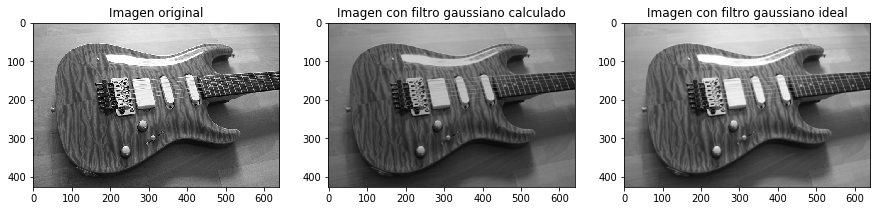

In [119]:
#Utilizamos una amplitud de 36, una media de x e y igual a 0
# y una desviación de 1 para x e y.
gauss = Gaussian2D(36, 0, 0, 1, 1)

#Definimos nuestras dimensiones.
x = np.arange(-2, 3)
y = np.arange(-2, 3)

#Transformamos x e y en matrices.
x,y = np.meshgrid(x, y)

#Los valores aleatorios los tomamos como enteros, cambiando rand por randint.
data_2D = gauss(x, y) + (np.random.randint(1, size=(5,5)))
data_2D = data_2D.astype('uint8')

#Máscara ideal.
filterg = np.array([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]])

print("matriz x:\n\n", x)
print("\nmatriz y:\n\n", y)
print("\nMáscara 5x5 Gaussiana:\n\n", data_2D)
print("\nMáscara 5x5 ideal: \n\n", filterg)

#Filtramos
imagen_g1 = cv.filter2D(imagen,-1,data_2D/256)
imagen_g2 = cv.filter2D(imagen,-1,filterg/256)

#Creamos la grilla
gs = gridspec.GridSpec(1, 3)

#Define los tamaños de las imágenes
figs = plt.figure(constrained_layout=True)
figs.set_figheight(10)
figs.set_figwidth(15)

#Aquí se pueden definir los tamaños de las celdas.
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])

#Graficamos
ax1.set_title("Imagen original")
ax1.imshow(imagen, cmap='gray', vmin=0, vmax=255)

ax2.set_title("Imagen con filtro gaussiano calculado")
ax2.imshow(imagen_g1, cmap='gray', vmin=0, vmax=255)

ax3.set_title("Imagen con filtro gaussiano ideal")
ax3.imshow(imagen_g2, cmap='gray', vmin=0, vmax=255)

plt.show()

Vemos que si bien el difuminado es similar, en la imagen con el filtro calculado se observa que la misma está oscurecida.

Obtenemos ahora una máscara cuadrada y su traspuesta para detección de bordes. Usamos un operador de sobel de 5x5 que se define de la siguiente manera.

$$G_x=\left[\begin{matrix} 2&2&4&2&2  \\ 1&1&2&1&1 \\ 0&0&0&0&0 \\ -1&-1&-2&-1&-1 \\ -2&-2&-4&-1&-1 \end{matrix}\right]$$

$$G_y=G_x^T$$

[Sobel Operator](https://www.researchgate.net/figure/Sobel-convolution-kernels5x5_fig1_49619233)

Para hacer la convolución en 2D se importó el módulo scipy y se siguió la siguiente documentación.

[Scipy](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.signal.convolve2d.html)


In [1]:
#Definimos los operadores de sobel como indicamos anteriormente. 
#Se encontró que hay varias definiciones para un operador de Sobel de 5x5
sobelx = np.arange(-2,3)*-1
sobely = np.arange(-2,3)*-1
sobely, sobelx = np.meshgrid(sobely,sobelx)
sobelx[:,2]=sobelx[:,2]*2
sobely[2,:]=sobely[2,:]*2

#Mostramos los operadores de Sobel calculados
print("Gx: \n", sobelx, "\n\n\nGy:\n",sobely)

#Importamos el módulo
from scipy import signal
from scipy import misc

filtradox = signal.convolve2d(imagen, sobelx, boundary='symm', mode='same')
filtradoy = signal.convolve2d(imagen, sobely, boundary='symm', mode='same')

#Creamos la grilla
gs = gridspec.GridSpec(1, 3)

#Define los tamaños de las imágenes
figs = plt.figure(constrained_layout=True)
figs.set_figheight(15)
figs.set_figwidth(20)

#Aquí se pueden definir los tamaños de las celdas.
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])

#Graficamos
ax1.set_title("Imagen original")
ax1.imshow(imagen, cmap='gray')

ax2.set_title("Imagen con filtro Sobel X")
ax2.imshow(filtradox, cmap='gray')

ax3.set_title("Imagen con filtro Sobel Y")
ax3.imshow(filtradoy, cmap='gray')

plt.show()

NameError: name 'np' is not defined

Como se indica en el siguiente artículo.

[Sobel Derivatives](https://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/sobel_derivatives/sobel_derivatives.html)

Podemos combinar las dos imágenes filtradas en una mediante la siguiente operación.

$$G = \sqrt{G_x^2+G_y^2}$$

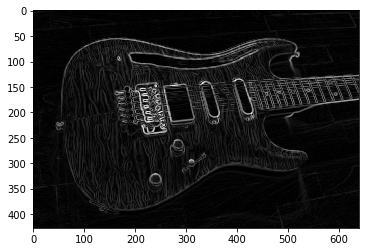

In [122]:
G = np.sqrt(filtradox**2+filtradoy**2)

plt.imshow(G, cmap='gray')
plt.show()

## Ejercicio 9:

### Considere tanto los valores positivos como los valores negativos de la imagen filtrada para detección de bordes, calculando el valor absoluto de cada pixel. Binarice dicha imagen con un umbral que considere adecuado y de forma tal que logre los bordes negros y el fondo blanco. Muestre ambas imágenes.


Filtrado x

 [[ -35  -40  -47 ...   -4   -9  -12]
 [   2  -29  -58 ...  -84  -88  -88]
 [-157 -185 -210 ... -146 -141 -133]
 ...
 [ 126  155  179 ...  -70  -93  -92]
 [ 113  103   81 ...  -76  -54  -23]
 [ -23  -21   -6 ... -102 -100 -103]] 

Filtrado y

 [[  0  60  29 ...  24  -2  -6]
 [-14  24   6 ...  20   3  -1]
 [-18   1 -20 ...  16  12   5]
 ...
 [  2  22  13 ... -52  19  37]
 [ 22  72  63 ... -88   4  39]
 [ 13  55  41 ... -74  47  49]]


Filtrado x

 [[ 35  40  47 ...   4   9  12]
 [  2  29  58 ...  84  88  88]
 [157 185 210 ... 146 141 133]
 ...
 [126 155 179 ...  70  93  92]
 [113 103  81 ...  76  54  23]
 [ 23  21   6 ... 102 100 103]] 

Filtrado y

 [[ 0 60 29 ... 24  2  6]
 [14 24  6 ... 20  3  1]
 [18  1 20 ... 16 12  5]
 ...
 [ 2 22 13 ... 52 19 37]
 [22 72 63 ... 88  4 39]
 [13 55 41 ... 74 47 49]]


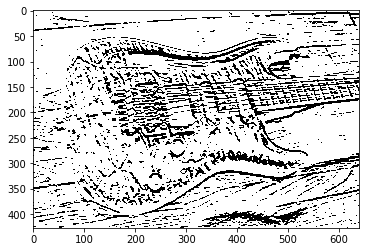

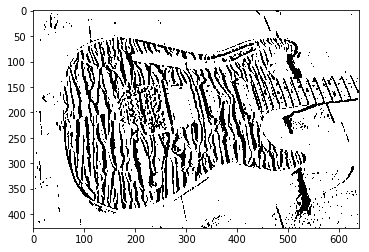

In [126]:
#Las matrices de las imágenes filtradas son:
print("Filtrado x\n\n", filtradox,"\n\nFiltrado y\n\n",filtradoy)

#Usamos la función valor absoluto para ambas matrices.
filtradox_pos = abs(filtradox)
filtradoy_pos = abs(filtradoy)

print("\n\nFiltrado x\n\n", filtradox_pos,"\n\nFiltrado y\n\n",filtradoy_pos)

filtradox_bin = binaria(len(filtradox[:,0]),len(filtradox[0,:]),100,filtradox,2)
filtradoy_bin = binaria(len(filtradoy[:,0]),len(filtradoy[0,:]),100,filtradoy,2)
            
plt.imshow(filtradox_bin, cmap='gray')
plt.show()
plt.imshow(filtradoy_bin, cmap='gray')
plt.show()

*"On the other hand, there exist some disadvantages of the Sobel method. That is, it is sensitive to the
noise. The magnitude of the edges will degrade as the level of noise present in image increases. As a
result, Sobel operator accuracy suffers as the magnitude of the edges decreases. Overall, the Sobel
method cannot produce accurate edge detection with thin and smooth edge"*

[Sobel Operator & Canny Edge Detector](www.egr.msu.edu/classes/ece480/capstone/fall13/group04/docs/danapp.pdf)

Si bien no es ruido lo que presenta la imagen original, las sombras y los brillos del objeto pueden contribuir a disminuir la eficiencia del operador Sobel, y se hace improbable que se puedan detectar los bordes de una manera clara.

## Ejercicio 10:

### Sea creativo, proponga un ejercicio y resuélvalo con las herramientas adquiridas hasta el momento.

##### Vamos a listar los conceptos aprendidos hasta el momento.

* Vimos como se representa una imagen mediante una matriz, ya sea de dos dimensiones o tres, dependiendo si tiene o no color, y que sus valores varían de 0 a 1 o de 0 a 255.
* Obtuvimos el negativo de la imagen, como así también versiones más claras y más oscuras de la misma. Vimos el concepto de ecualización. 
* Se obtuvo por dos métodos diferentes la versión binaria de la imagen.
* Se utilizaron máscaras para operaciones de filtrado. Filtro de media y filtro gaussiano
* Se utilizaron máscaras y operaciones de convolución para la detección de bordes.


Lo que vamos a hacer es intentar hacer un poco más legible los textos que aparecen en las imágenes "captchas" que se encuentran en algunas páginas de descargas.

Las imágenes que vamos a analizar son las siguientes.

![](1.png)
![](2.png)

Como puede verse la primera está bastante clara, y aunque la segunda puede leerse de manera aceptable requiere un poco más de esfuerzo, sobretodo para leer las últimas dos letras.

Vamos a tratar de mejorar la lectura de los textos que aparecen en las imágenes anteriores.

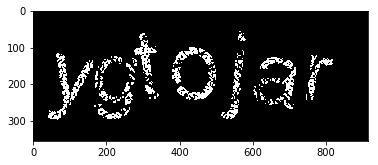

In [171]:
#Abrimos la primer imagen
imagen_1 = cv.imread('1.png', cv.IMREAD_GRAYSCALE)

#Convertimos a uint8
imagen_1 = imagen_1.astype('uint8')

#Oscurecemos la imagen y hacemos más notorio el texto.
osc = gamma(imagen_1, 5)

#Binarizamos la imagen
imagen_bin_1 = binaria(len(osc[:,0]),len(osc[0,:]),10,osc,2)

plt.imshow(imagen_bin_1, cmap='gray')
plt.show()

Pasos muy simples y quizás algunos innecesarios, pero se puede ver que la lectura es muy clara.

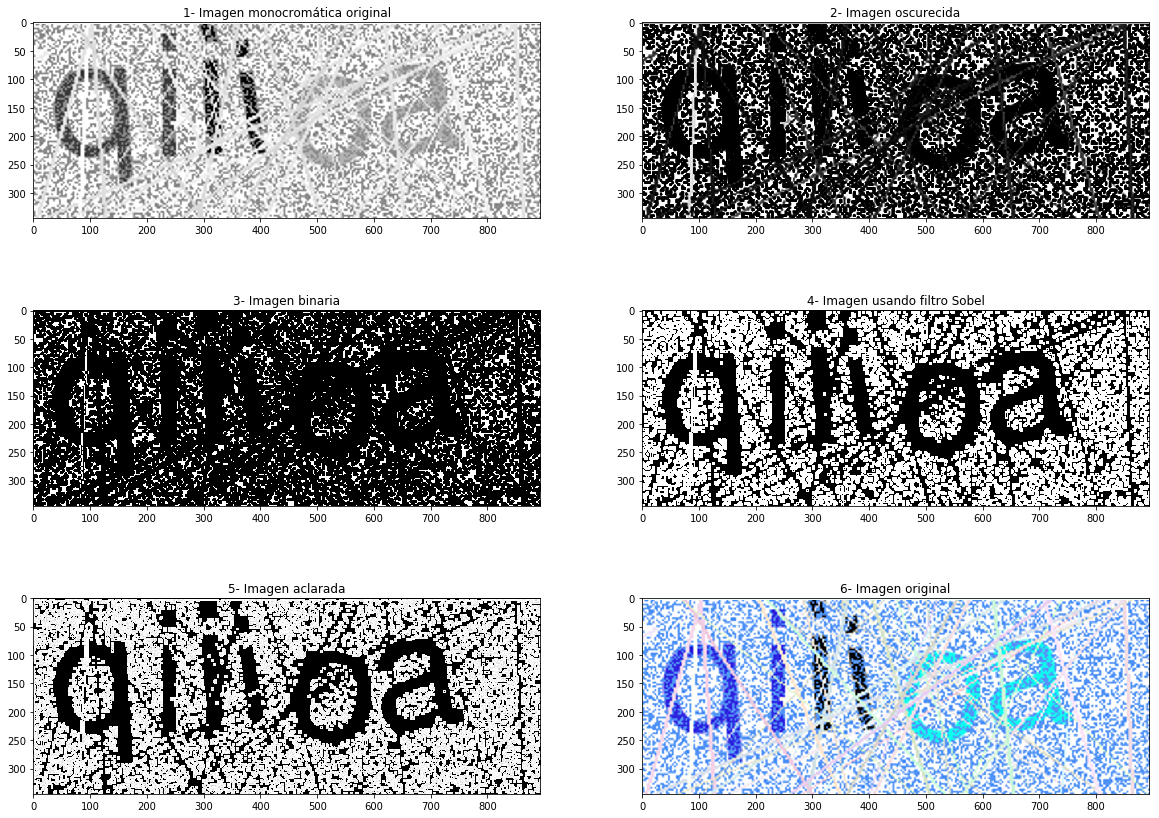

In [325]:
#Abrimos la segunda imagen
original = cv.imread('2.png')
imagen_2 = cv.imread('2.png', cv.IMREAD_GRAYSCALE)

#Convertimos a uint8
imagen_2 = imagen_2.astype('uint8')

#Oscurecemos la imagen.
osc_2 = gamma(imagen_2, 20)

#Binarizamos la imagen.
imagen_bin_2 = binaria(len(osc_2[:,0]),len(osc_2[0,:]),230,osc_2,1)

#Usando las máscaras de Sobel definidas antes.
filtradox = signal.convolve2d(imagen_bin_2, sobelx, boundary='symm', mode='same')
filtradoy = signal.convolve2d(imagen_bin_2, sobely, boundary='symm', mode='same')

#Aplicando la fórmula de Sobel
sobel = np.sqrt(filtradox**2+filtradoy**2)

#Aclaramos la imagen
aclarada = gamma(final, .05)

#Creamos la grilla
gs = gridspec.GridSpec(3, 2)

#Define los tamaños de las imágenes
figs = plt.figure(constrained_layout=True)
figs.set_figheight(15)
figs.set_figwidth(20)

#Aquí se pueden definir los tamaños de las celdas.
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])
ax3 = plt.subplot(gs[1,0])
ax4 = plt.subplot(gs[1,1])
ax5 = plt.subplot(gs[2,0])
ax6 = plt.subplot(gs[2,1])

#Graficamos
ax1.set_title("1- Imagen monocromática original")
ax1.imshow(imagen_2, cmap='gray', vmin=0, vmax=255)

ax2.set_title("2- Imagen oscurecida")
ax2.imshow(osc_2, cmap='gray', vmin=0, vmax=255)

ax3.set_title("3- Imagen binaria")
ax3.imshow(imagen_bin_2, cmap='gray', vmin=0, vmax=255)

ax4.set_title("4- Imagen usando filtro Sobel")
ax4.imshow(sobel, cmap='gray', vmin=0, vmax=255)

ax5.set_title("5- Imagen aclarada")
ax5.imshow(aclarada, cmap='gray', vmin=0, vmax=255)

ax6.set_title("6- Imagen original")
ax6.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB), cmap='gray', vmin=0, vmax=255)

plt.show()

La imagen oscurecida y la binaria parecen ser prácticamente iguales, o incluso la imagen binaria parece empeorar el proceso, a la hora de aplicar el filtro Sobel se notan las diferencias.
Las últimas dos letras se leen mucho más fácilmente que en la imagen original. 